# Federico Ariton
### Higher Diploma in Science in Data Analytics for Business
### CA 2 Integrated
### Student Number:sba22090

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importing the dataset
Employee = pd.read_csv('Employee_Attrition.csv')
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,...,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,...,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


In [3]:
# Size of the dataset
Employee.shape

(1470, 35)

In [4]:
# Implementing 'describe' method provides a summary of the
# statistics of the dataset numeric columns.
Employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [5]:
Employee.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [6]:
# Analyzing missing values in the dataset
Employee.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [7]:
# Calling the 'info' method on the dataset 
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [8]:
# Implementing the data types of each column, and check the value,string,int...
Employee.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [9]:
# Describing the value that has object,that we previously visualize in the .dtypes
Employee.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [10]:
# Visualizing the name of the columns
Employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

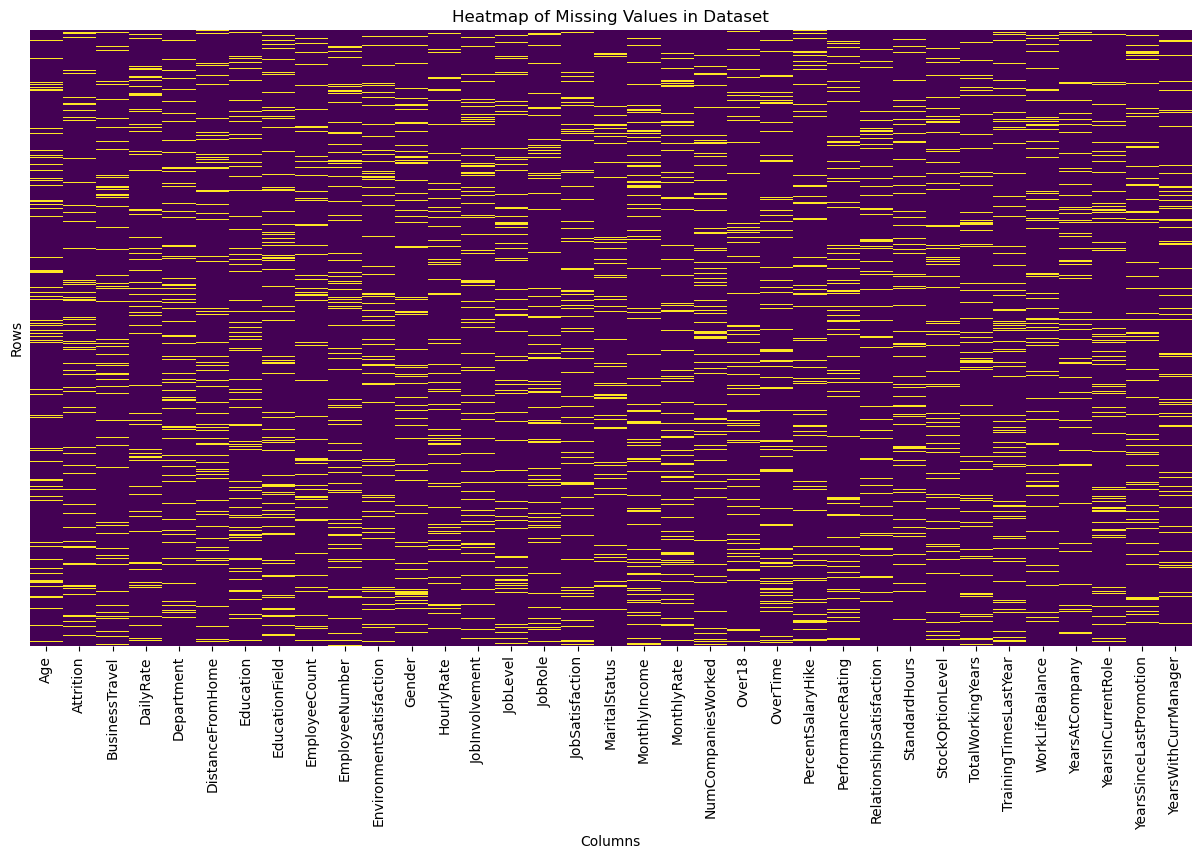

In [11]:
# Creating a heatmap for missing values
plt.figure(figsize=(15, 8))
sns.heatmap(Employee.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [12]:
missing_values = Employee.isnull().sum()
missing_values

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [13]:
print(Employee['EnvironmentSatisfaction'])

0       2.146294
1       3.470803
2       3.979420
3       3.734705
4       1.079412
          ...   
1465    3.171444
1466    4.284094
1467    2.152282
1468    4.095580
1469    1.738502
Name: EnvironmentSatisfaction, Length: 1470, dtype: float64


In [14]:
duplicated_data = Employee.duplicated().any()
duplicated_data

False

In [15]:
Employee[['Age', 'Attrition']]



,Age,Attrition
0,41.920786,Yes
1,51.589037,No
2,33.131540,Yes
3,34.707073,No
4,24.790188,No
...,...,...
1465,37.421699,No
1466,34.957777,No
1467,26.884296,No
1468,NaN,No


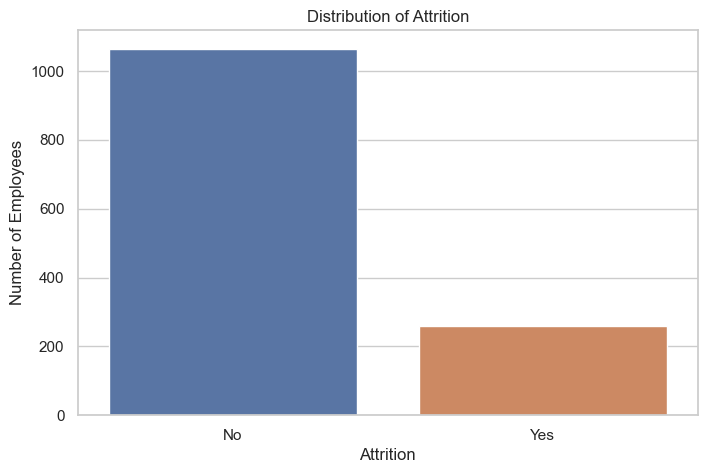

No     1065
Yes     258
Name: Attrition, dtype: int64

In [16]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'Attrition' column
attrition_count = Employee['Attrition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_count.index, y=attrition_count.values)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

attrition_count

# Data Cleanning

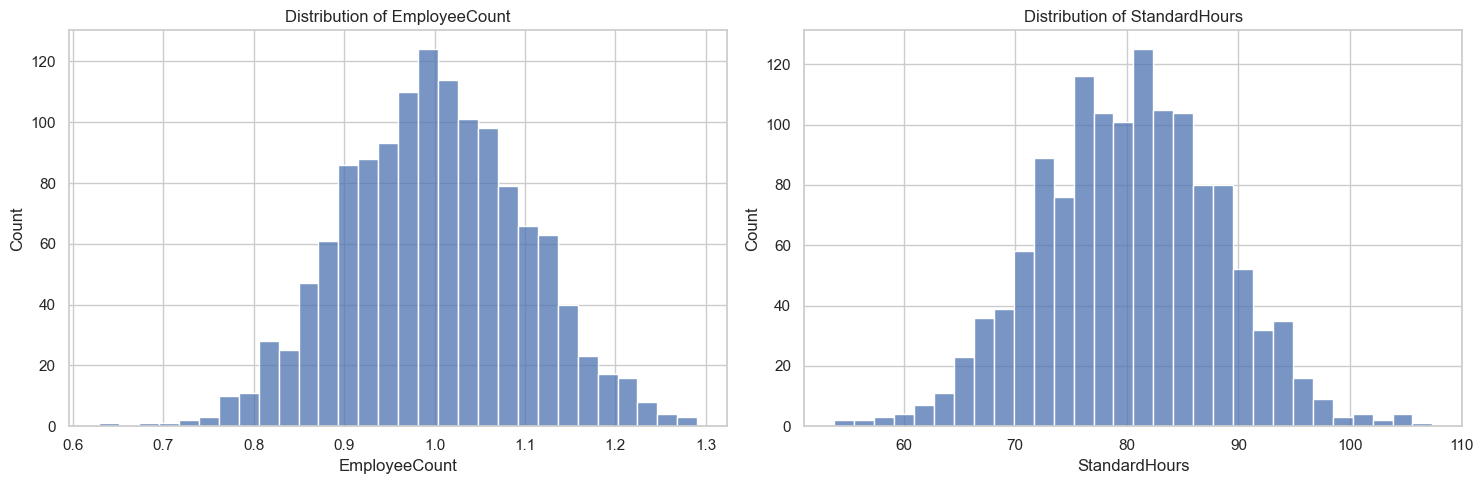

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'EmployeeCount' and 'StandardHours'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of EmployeeCount
sns.histplot(Employee['EmployeeCount'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of EmployeeCount')

# Distribution of StandardHours
sns.histplot(Employee['StandardHours'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of StandardHours')

plt.tight_layout()
plt.show()


In [18]:
# Analyzing the relationship between 'EmployeeCount', 'StandardHours' and key variables
key_variables = ['Attrition', 'JobSatisfaction', 'WorkLifeBalance']

# Creating a new DataFrame for correlation analysis
correlation_data = Employee[['EmployeeCount', 'StandardHours'] + key_variables]

# Computing correlation
correlation_matrix = correlation_data.corr()

# Displaying the correlation matrix
correlation_matrix[['EmployeeCount', 'StandardHours']]


,EmployeeCount,StandardHours
EmployeeCount,1.000000,-0.003399
StandardHours,-0.003399,1.000000
JobSatisfaction,0.011087,0.030721
WorkLifeBalance,-0.004015,-0.018620


In [19]:
# Dropping the columns 'EmployeeCount', 'StandardHours', 'Over18', and 'EmployeeNumber'
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
Employee = Employee.drop(columns=columns_to_drop)

# Displaying the first few rows of the cleaned dataframe
Employee


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,NaN,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,3.171444,Male,...,2.968558,3.020184,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,4.284094,Male,...,2.800889,1.014690,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,2.152282,Male,...,NaN,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,4.095580,Male,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


In [20]:
# Checking for missing values in each column
missing_values = Employee.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (missing_values / len(Employee)) * 100

# Creating a DataFrame to display missing data stats
missing_stats = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_stats


,Missing Values,Percentage
Age,147,10.0
MonthlyIncome,147,10.0
YearsSinceLastPromotion,147,10.0
YearsInCurrentRole,147,10.0
YearsAtCompany,147,10.0
WorkLifeBalance,147,10.0
TrainingTimesLastYear,147,10.0
TotalWorkingYears,147,10.0
StockOptionLevel,147,10.0
RelationshipSatisfaction,147,10.0


In [21]:
# Selecting only numerical columns
numerical_data = Employee.select_dtypes(include=[np.number])

# Using IQR (Interquartile Range) to detect outliers
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Determining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (numerical_data < lower_bound) | (numerical_data > upper_bound)

# Count of outliers in each column
outlier_counts = outliers.sum().sort_values(ascending=False)
outlier_counts[outlier_counts > 0]

YearsSinceLastPromotion    157
MonthlyIncome               98
PerformanceRating           90
YearsAtCompany              79
TrainingTimesLastYear       67
StockOptionLevel            67
TotalWorkingYears           54
NumCompaniesWorked          42
JobLevel                    35
YearsInCurrentRole          15
PercentSalaryHike           14
Age                         13
YearsWithCurrManager        11
DistanceFromHome            10
WorkLifeBalance              9
JobInvolvement               5
Education                    1
dtype: int64

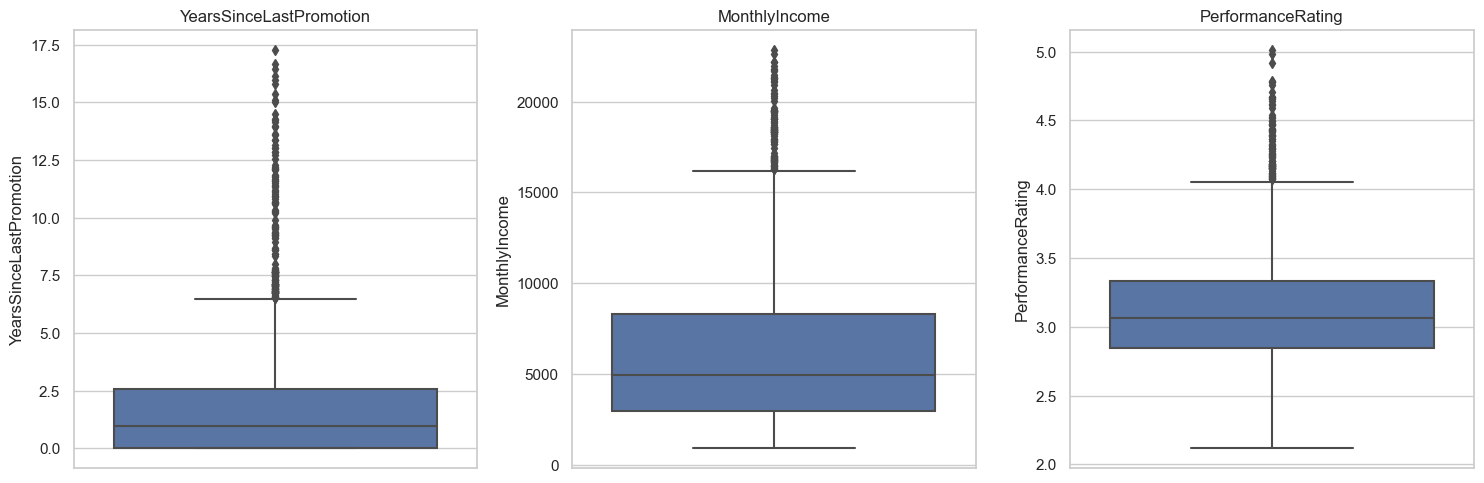

In [22]:
# Selecting top columns with the most outliers
columns_to_plot = ['YearsSinceLastPromotion', 'MonthlyIncome', 'PerformanceRating']

# Creating box plots
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=Employee[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [23]:
# Identifying numerical and categorical columns
numerical_cols = Employee.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = Employee.select_dtypes(include=['object']).columns.tolist()

# Separating columns with missing values into numerical and categorical
missing_numerical_cols = [col for col in numerical_cols if col in missing_values.index]
missing_categorical_cols = [col for col in categorical_cols if col in missing_values.index]

missing_numerical_cols, missing_categorical_cols


(['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'OverTime'])

In [24]:
# Imputation for numerical columns
for col in missing_numerical_cols:
    median_value = Employee[col].median()
    Employee[col].fillna(median_value, inplace=True)

# Imputation for categorical columns
for col in missing_categorical_cols:
    mode_value = Employee[col].mode()[0]
    Employee[col].fillna(mode_value, inplace=True)

# Check if there are any missing values left
Employee.isnull().sum().sum()


0

In [25]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [26]:
Employee.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
5,29.766336,No,Travel_Frequently,900.495555,Research & Development,1.805415,3.015658,Life Sciences,4.198522,Male,...,3.085446,2.798835,0.000000,6.694851,1.871592,2.046544,6.092499,8.389254,3.131537,7.060896
6,61.934723,No,Travel_Rarely,1284.456352,Research & Development,2.502578,3.015658,Medical,2.845946,Female,...,4.473227,0.809695,3.190519,11.226132,2.690934,2.198286,5.422160,0.000000,0.000000,0.000000
7,27.098235,No,Travel_Rarely,782.958705,Research & Development,22.329189,0.923262,Life Sciences,3.194771,Male,...,4.173202,2.062221,0.891104,1.058393,1.868045,2.899807,0.962310,0.000000,0.000000,0.000000
8,30.379999,No,Travel_Frequently,195.346240,Research & Development,6.920808,3.209049,Life Sciences,4.205716,Male,...,4.395156,2.156785,0.000000,10.088953,1.905135,3.104763,9.894773,7.992665,1.151091,7.080628
9,35.373614,No,Travel_Rarely,1277.914019,Research & Development,28.618060,3.144818,Technical Degree,2.887313,Male,...,2.895479,1.933506,1.947497,18.805415,3.008464,2.105678,5.959244,6.414024,0.967140,6.447820


In [27]:
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


# EDA

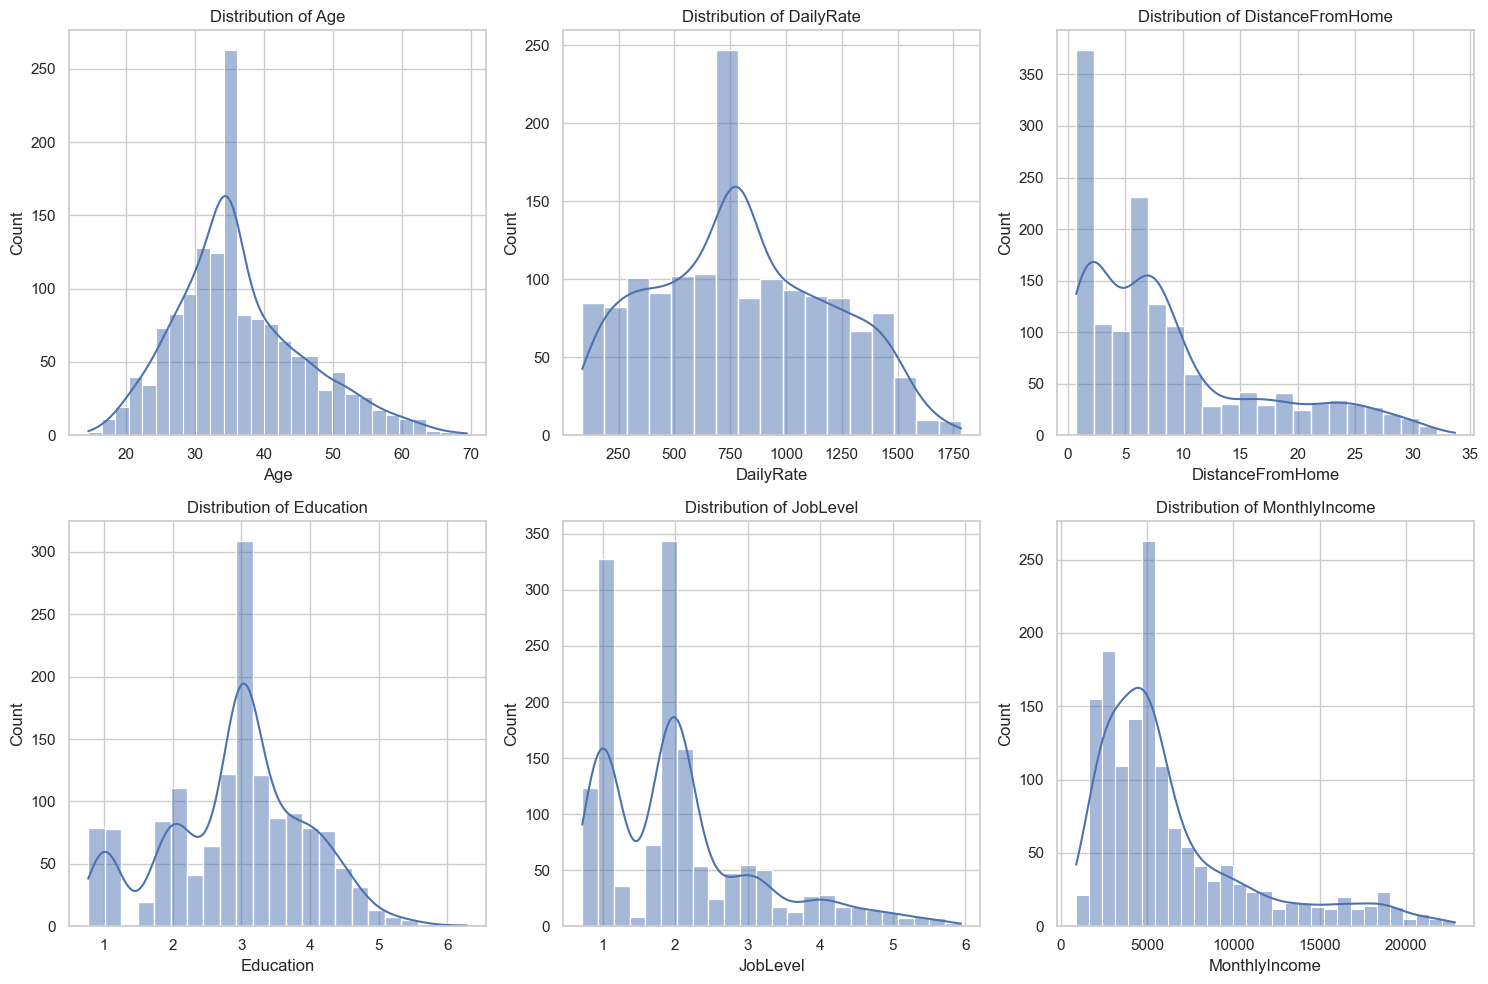

In [28]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Key Numerical Variables
key_numerical_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome']
plt.figure(figsize=(15, 10))

for i, var in enumerate(key_numerical_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(Employee[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


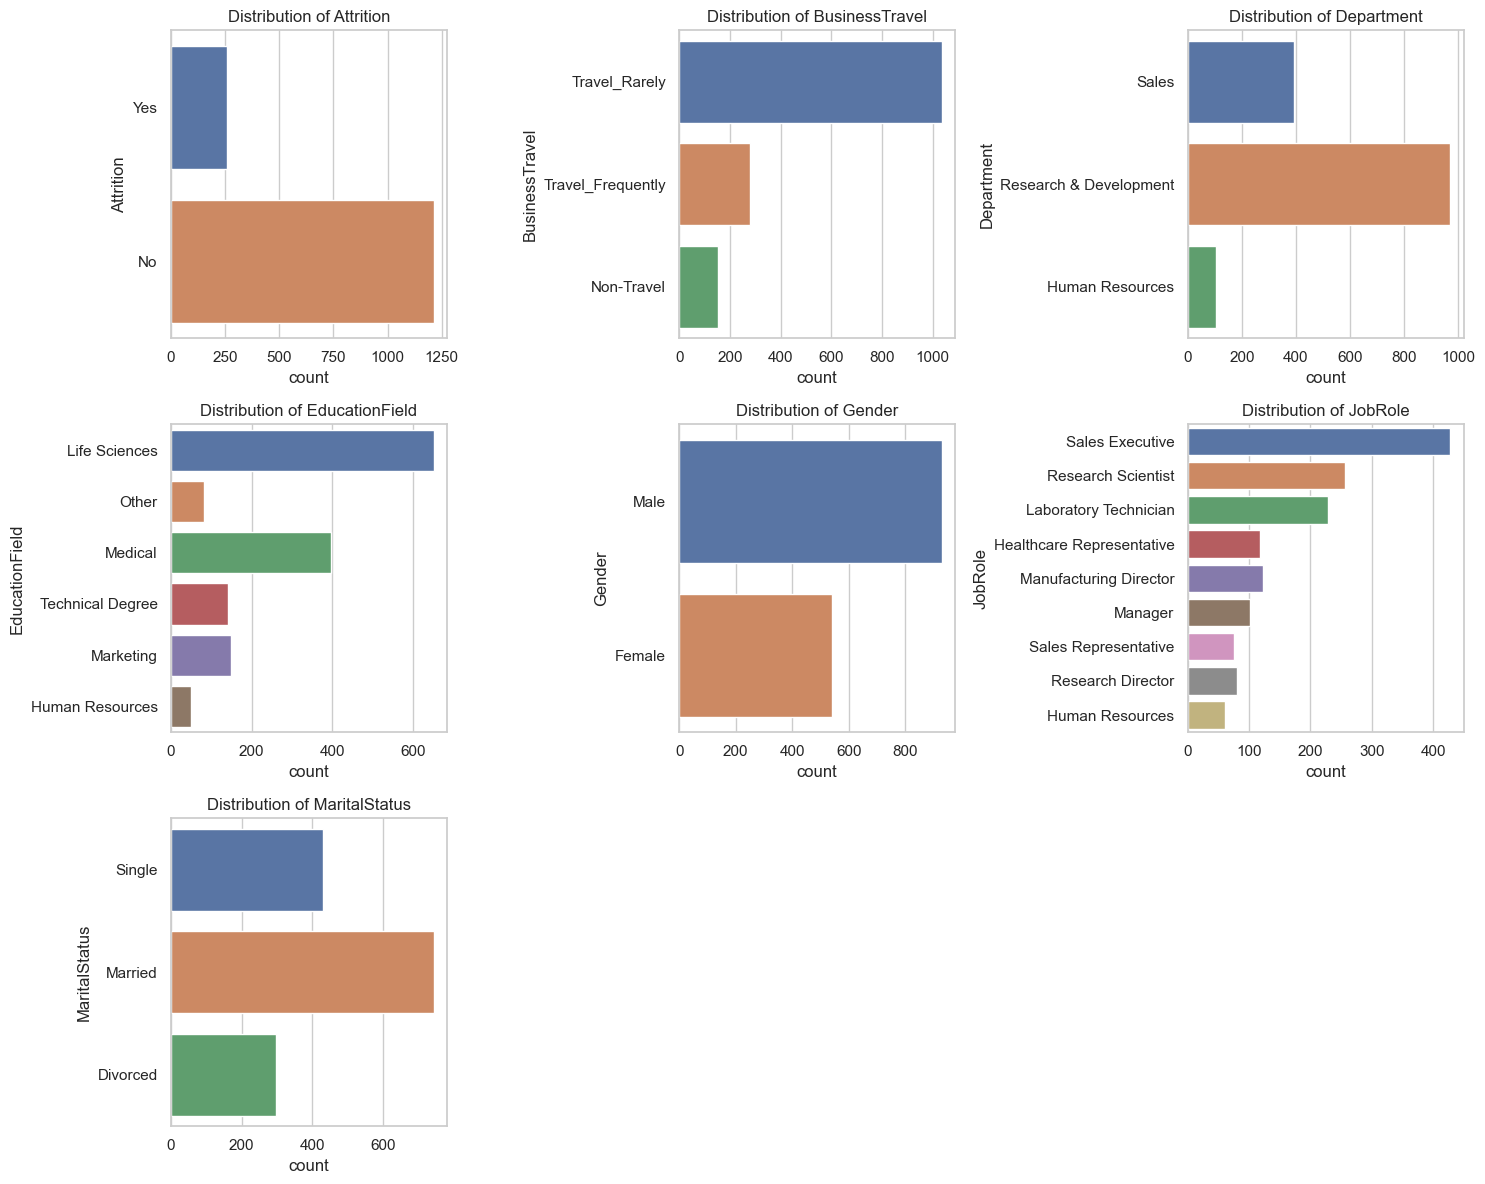

In [29]:
# Distribution of Key Categorical Variables
key_categorical_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
plt.figure(figsize=(15, 12))

for i, var in enumerate(key_categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=Employee[var])
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# ENCONDING DATA

In [30]:
# Select only the categorical columns
categorical_data = Employee.select_dtypes(include=['object'])

# Display the categorical data
print(categorical_data.head())  # This will display the first few rows

  Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences    Male   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently                   Sales  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No  


In [31]:
# Correct way to select multiple columns
selected_columns = ["BusinessTravel","Attrition", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
selected_data = Employee[selected_columns]

# Example of label encoding (if needed)
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
for column in selected_columns:
    Employee[column] = l_encoder.fit_transform(Employee[column].astype(str))

# Display the result
Employee


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


# SCALING DATA

In [32]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

df_scaled = pd.DataFrame(df_scaled, columns=Employee.columns)

df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,...,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,...,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,...,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,...,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,...,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,...,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,...,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,...,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,...,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


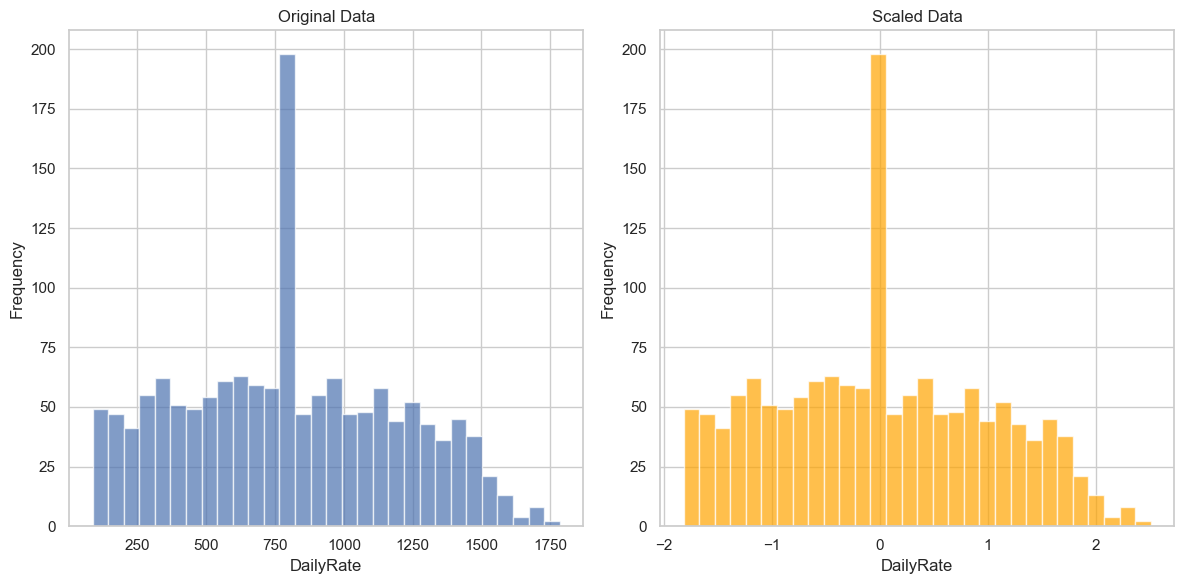

In [33]:
# Creating histograms
plt.figure(figsize=(12, 6))

# Histogram for original data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(Employee['DailyRate'], bins=30, alpha=0.7)
plt.title('Original Data')
plt.xlabel('DailyRate')
plt.ylabel('Frequency')

# Histogram for scaled data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df_scaled['DailyRate'], bins=30, alpha=0.7, color='orange')
plt.title('Scaled Data')
plt.xlabel('DailyRate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Splitting Data into Training and Testing

In [34]:
# Extracting the target variable 'DEATH'
# The variable 'y' is what the model will be trained to predict.
y = Employee['Attrition']

# Dropping the 'DEATH' column from the Covid_Data dataset
# to create the feature set.
x = Employee.drop('Attrition', axis=1)

In [35]:
# Splitting the dataset into training and testing sets.
# Will be use 20% of the data for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Getting the shape of the training and testing sets for both features (X) and target (y).
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

# PCA

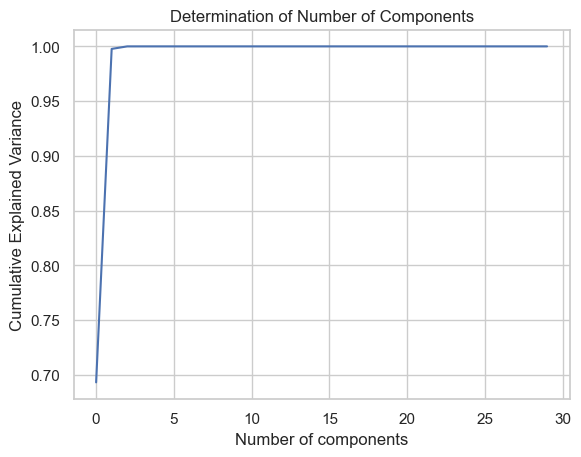

In [36]:
# Creating a PCA object and fitting it to the training data.
# This will compute the principal components for the training data (X_train).
from sklearn.decomposition import PCA
pca1 = PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Determination of Number of Components')
plt.show()

In [37]:
# Initializing PCA with 2 components.
# n_components=4 means that PCA will reduce the data to 4 dimensions.
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_X = pca.transform(X_train)
print(f'Shape of reduced data: - {reduced_X.shape}')

Shape of reduced data: - (1176, 2)


In [38]:
# Visualizing the reduced dataset
reduced_Test = pca.transform(X_test)
print(f'Shape of reduced data: - {reduced_Test.shape}')

Shape of reduced data: - (294, 2)


In [39]:
# Creating a Logistic Regression model to use with 
# the reduced dimensionality data from PCA.
pca_lr = LogisticRegression()
pca_lr.fit(reduced_X, y_train)
pred_lr_pca = pca_lr.predict(reduced_Test)

In [40]:
from sklearn.metrics import f1_score
# Calculating the weighted F1 score for the true and predicted labels.
# The 'weighted' average takes into account label imbalance
# by weighting the F1 score of each class by its support.
def metric(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print(f"{model_name} F1 Score: {f1}")

# Assuming that the y_test and pred_lr_pca from the model
metric('PCA: Logistic Regression',y_test, pred_lr_pca)

PCA: Logistic Regression Confusion Matrix:
[[247   0]
 [ 47   0]]
PCA: Logistic Regression F1 Score: 0.7671482641115597


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Running differents model from the PCA
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [43]:
# Implementing the model,and displaying the accurancy
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model,reduced_X,y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.820578 (0.002447)
LDA: 0.820578 (0.002447)
KNN: 0.794191 (0.018807)
NB: 0.820578 (0.002447)


# LDA

In [44]:
y = Employee['Attrition']

x = Employee.drop('Attrition', axis=1)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Determine the appropriate number of components
n_classes = len(set(y))  # Number of unique classes in the target variable
n_features = x.shape[1]  # Number of features
n_components = min(n_classes - 1, n_features)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(x, y).transform(x)




In [46]:
print(X_r2.shape)


(1470, 1)


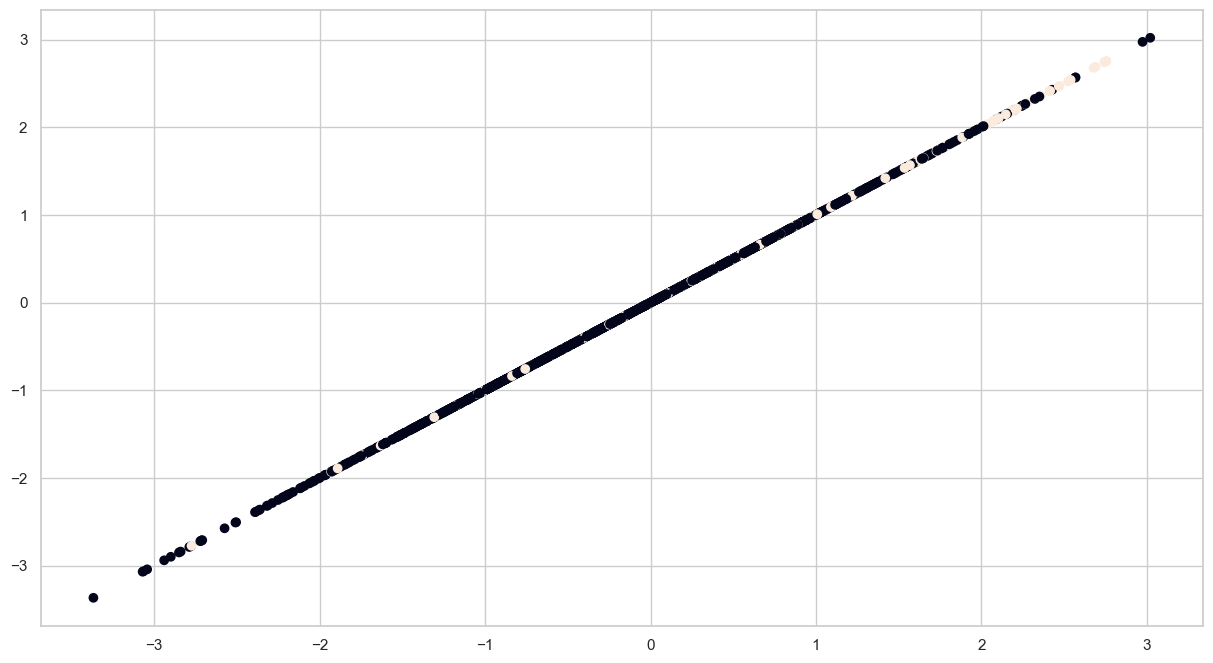

In [47]:
# importing the required module
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(X_r2[:,0],X_r2[:,0],  c=Employee.Attrition)
plt.show()

# Descriptive Statistic

In [50]:
# Descriptive statistics for numerical variables
numerical_descriptive_stats = Employee.describe().T

# Adding mode to the descriptive statistics (mode is calculated separately as it's not part of describe())
modes = Employee.mode().iloc[0]
numerical_descriptive_stats['mode'] = modes

numerical_descriptive_stats[['mean', '50%', 'mode', 'std', 'min', 'max']]


,mean,50%,mode,std,min,max
Age,36.466937,34.951950,34.951950,9.388288,14.544608,69.402515
Attrition,0.175510,0.000000,0.000000,0.380532,0.000000,1.000000
BusinessTravel,1.600680,2.000000,2.000000,0.670592,0.000000,2.000000
DailyRate,800.122915,782.958705,782.958705,392.811161,86.828045,1784.394456
Department,1.195238,1.000000,1.000000,0.549129,0.000000,2.000000
DistanceFromHome,8.874068,6.920808,6.920808,7.785207,0.750112,33.684424
Education,2.932668,3.015658,3.015658,1.017519,0.770362,6.285161
EducationField,2.161224,2.000000,1.000000,1.382274,0.000000,5.000000
EnvironmentSatisfaction,2.742530,2.887313,2.887313,1.072754,0.759655,5.254672
Gender,0.632653,1.000000,1.000000,0.482246,0.000000,1.000000


In [51]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


In [52]:
# Identifying key variables for analysis
key_variables = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'YearsAtCompany']

# Descriptive statistics for key variables
key_var_descriptive_stats = Employee[key_variables].describe().T

# Adding mode to the descriptive statistics for key variables
key_var_modes = Employee[key_variables].mode().iloc[0]
key_var_descriptive_stats['mode'] = key_var_modes

key_var_descriptive_stats[['mean', '50%', 'mode', 'std', 'min', 'max']]


,mean,50%,mode,std,min,max
JobSatisfaction,2.733248,2.895032,2.895032,1.089233,0.724192,5.251277
EnvironmentSatisfaction,2.742530,2.887313,2.887313,1.072754,0.759655,5.254672
RelationshipSatisfaction,2.737511,2.891235,2.891235,1.059892,0.720696,5.092280
PerformanceRating,3.140864,3.064551,3.064551,0.452298,2.116951,5.013371
YearsAtCompany,6.782477,5.422160,5.422160,5.754185,0.000000,36.848408


In [53]:
# Selecting the specific categorical variables
selected_categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 
    'EducationField', 'Gender', 'JobRole', 
    'MaritalStatus', 'OverTime'
]

# Frequency distributions for selected categorical columns
selected_frequency_distributions = {column: Employee[column].value_counts(normalize=True) * 100 for column in selected_categorical_columns}

selected_frequency_distributions_results = {column: selected_frequency_distributions[column].to_dict() for column in selected_categorical_columns}
selected_frequency_distributions_results


{'Attrition': {0: 82.44897959183673, 1: 17.551020408163264},
 'BusinessTravel': {2: 70.54421768707483,
  1: 18.979591836734695,
  0: 10.476190476190476},
 'Department': {1: 66.05442176870748,
  2: 26.73469387755102,
  0: 7.210884353741497},
 'EducationField': {1: 44.285714285714285,
  3: 27.006802721088434,
  2: 10.136054421768707,
  5: 9.591836734693878,
  4: 5.646258503401361,
  0: 3.3333333333333335},
 'Gender': {1: 63.26530612244898, 0: 36.734693877551024},
 'JobRole': {7: 29.115646258503403,
  6: 17.482993197278912,
  2: 15.578231292517005,
  4: 8.299319727891156,
  0: 8.027210884353742,
  3: 6.870748299319727,
  5: 5.442176870748299,
  8: 5.1020408163265305,
  1: 4.081632653061225},
 'MaritalStatus': {1: 50.544217687074834,
  2: 29.183673469387756,
  0: 20.272108843537413},
 'OverTime': {0: 73.19727891156462, 1: 26.802721088435373}}

# Confidence intervals

In [54]:
from scipy import stats

available_variables = ['JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'EnvironmentSatisfaction']

# Function to calculate the 95% confidence interval for the mean
def calculate_confidence_interval(data):
    mean = np.nanmean(data)
    std_error = stats.sem(data, nan_policy='omit')
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
    return mean, confidence_interval

# Calculate confidence intervals for each relevant variable
confidence_intervals = {}
for var in available_variables:
    if var in Employee.columns:
        mean, interval = calculate_confidence_interval(Employee[var])
        confidence_intervals[var] = {'Mean': mean, '95% Confidence Interval': interval}

confidence_intervals



{'JobSatisfaction': {'Mean': 2.733247976010997,
  '95% Confidence Interval': (2.6775206776018288, 2.788975274420165)},
 'WorkLifeBalance': {'Mean': 2.776523514467371,
  '95% Confidence Interval': (2.7394899091134968, 2.8135571198212452)},
 'PerformanceRating': {'Mean': 3.1408644445889964,
  '95% Confidence Interval': (3.1177239782711594, 3.1640049109068333)},
 'EnvironmentSatisfaction': {'Mean': 2.742529939788859,
  '95% Confidence Interval': (2.6876456958131985, 2.7974141837645194)}}

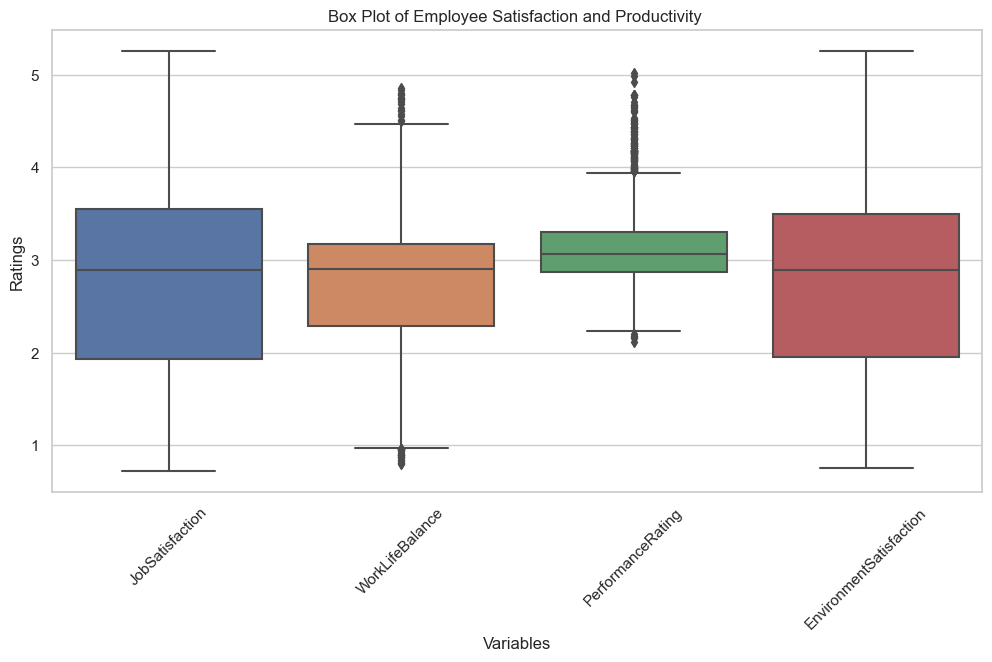

In [55]:
# Setting plot style
sns.set(style="whitegrid")

# Creating a DataFrame for plotting
plot_data = Employee[available_variables]

# Creating box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data)
plt.title('Box Plot of Employee Satisfaction and Productivity ')
plt.ylabel('Ratings')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

# Anova

<Figure size 640x480 with 0 Axes>

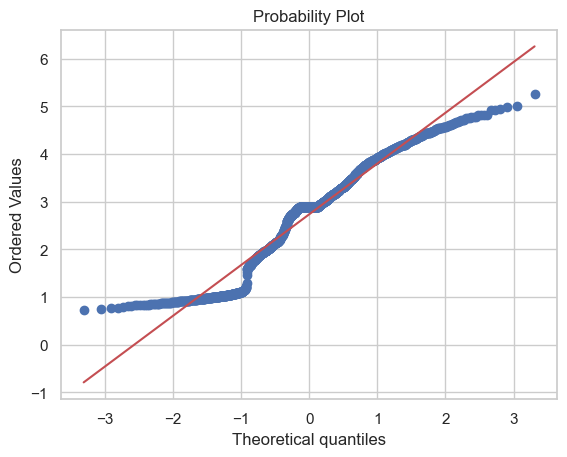

<Figure size 640x480 with 0 Axes>

In [56]:
from scipy import stats

stats.probplot(Employee.JobSatisfaction, plot = plt)
plt.figure()

In [57]:
# Descriptive statistics for 'JobSatisfaction'
job_satisfaction_stats = Employee['JobSatisfaction'].describe()
job_satisfaction_mode = Employee['JobSatisfaction'].mode()[0]

# Creating a summary for 'JobSatisfaction'
job_satisfaction_summary = job_satisfaction_stats.to_frame()
job_satisfaction_summary.loc['mode'] = job_satisfaction_mode

job_satisfaction_summary.T


,count,mean,std,min,25%,50%,75%,max,mode
JobSatisfaction,1470.0,2.733248,1.089233,0.724192,1.935855,2.895032,3.552882,5.251277,2.895032


In [58]:
import scipy.stats as stats

# ANOVA Test: Job Satisfaction Across Different Departments
anova_data = Employee[['JobSatisfaction', 'Department']].dropna()
groups = anova_data['Department'].unique()
anova_groups = [anova_data['JobSatisfaction'][anova_data['Department'] == group] for group in groups]

# Performing the ANOVA test
anova_result = stats.f_oneway(*anova_groups)

# Independent Samples t-test: Impact of Overtime on Job Satisfaction
ttest_data = Employee[['JobSatisfaction', 'OverTime']].dropna()
overtime_yes = ttest_data['JobSatisfaction'][ttest_data['OverTime'] == 'Yes']
overtime_no = ttest_data['JobSatisfaction'][ttest_data['OverTime'] == 'No']

# Performing the t-test
ttest_result = stats.ttest_ind(overtime_yes, overtime_no)

anova_result, ttest_result


(F_onewayResult(statistic=2.9520556388377326, pvalue=0.05254259606306379),
 TtestResult(statistic=nan, pvalue=nan, df=nan))

In [59]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


In [60]:
pd.set_option('display.max_columns', None)
Employee.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,93.827486,3.426960,2.464492,7,3.397665,2,6438.949336,20845.103714,7.077818,1,9.898765,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,52.304157,1.813458,1.788697,6,1.584059,1,4457.659622,24877.898697,1.114423,0,14.495151,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,87.271332,1.877226,0.833488,2,3.301009,2,2124.545220,2262.942954,5.539591,1,15.401596,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,56.378982,2.932646,1.095372,6,3.220844,1,2771.699080,27189.905714,0.772793,1,9.757546,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,40.433887,3.117739,0.937746,2,1.697330,1,3254.601575,17675.541599,10.118125,0,11.920147,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


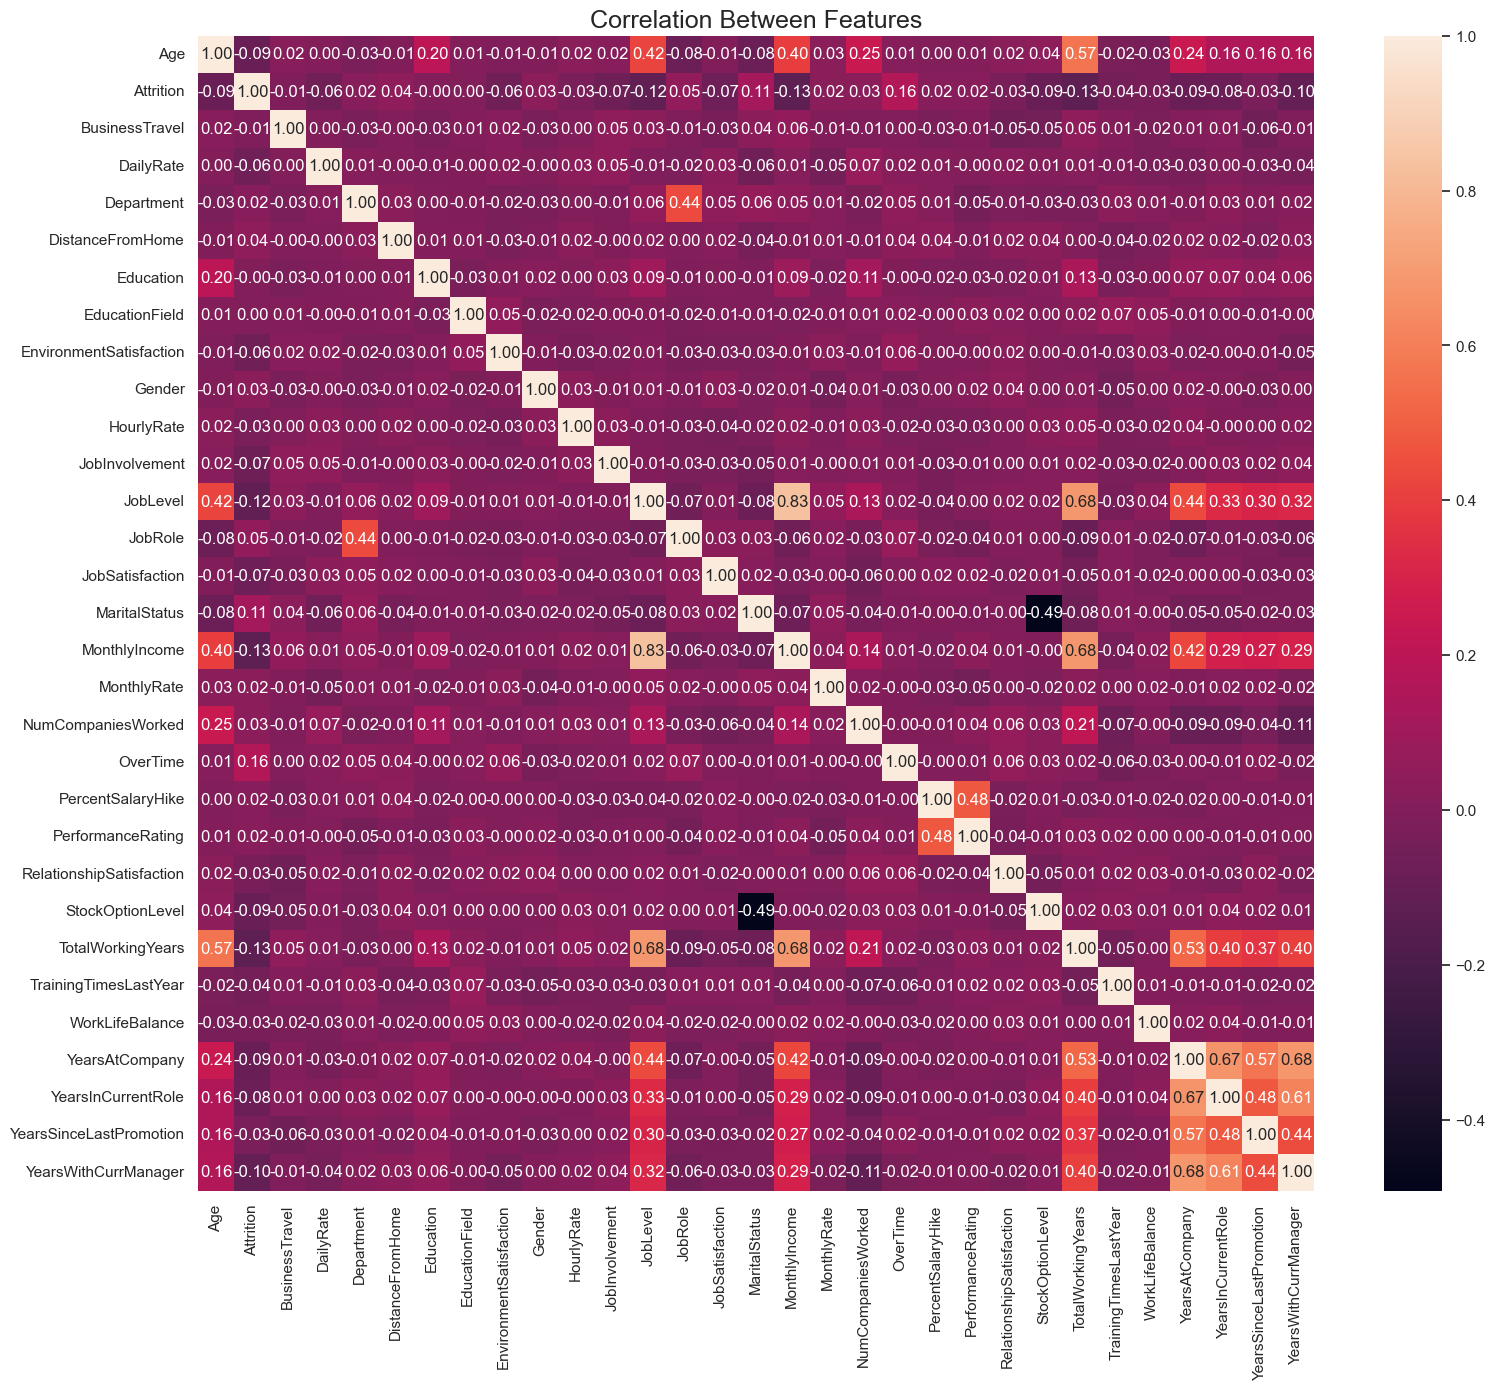

In [61]:
# Visualizing the features in our data set measuring how
# close are realted two variable to each other
plt.figure(figsize=(18,15))
sns.heatmap(Employee.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)
plt.show()

In [62]:
import numpy as np

correlation_matrix = Employee.corr()



# Re-extracting the upper triangle of the correlation matrix
upper_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flattening the matrix and removing NaN values
correlation_pairs = upper_corr_matrix.unstack().dropna()

# Sorting the pairs by absolute correlation value in descending order
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Displaying the sorted correlation pairs
sorted_correlation_pairs.head(30)  # Displaying the top 10 pairs for brevity


MonthlyIncome            JobLevel                   0.834294
TotalWorkingYears        JobLevel                   0.684815
                         MonthlyIncome              0.681825
YearsWithCurrManager     YearsAtCompany             0.677293
YearsInCurrentRole       YearsAtCompany             0.669736
YearsWithCurrManager     YearsInCurrentRole         0.614487
YearsSinceLastPromotion  YearsAtCompany             0.567746
TotalWorkingYears        Age                        0.567280
YearsAtCompany           TotalWorkingYears          0.525889
StockOptionLevel         MaritalStatus              0.491849
YearsSinceLastPromotion  YearsInCurrentRole         0.478939
PerformanceRating        PercentSalaryHike          0.477584
YearsWithCurrManager     YearsSinceLastPromotion    0.442938
JobRole                  Department                 0.438088
YearsAtCompany           JobLevel                   0.437019
                         MonthlyIncome              0.424818
JobLevel                

# Machine learning

### Implelementing the reduced data in the LogisticRegression model

In [63]:
# Splitting the resampled dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y_train, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((940, 2), (236, 2), (940,), (236,))

In [64]:
# Training the Logistic Regression model on the resampled training data.
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.8050847457627118


In [65]:
# This instance 'log_reg' will be used to train the model and make predictions.
log_reg = LogisticRegression()

# Evaluating the model on the test data.
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.8050847457627118


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

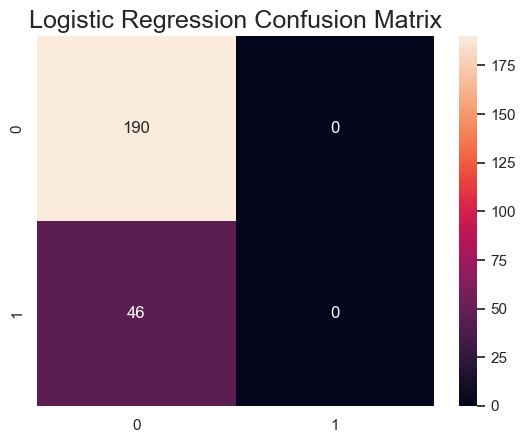

In [66]:
# Visualazing the confusion Matrix

sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

In [67]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,93.827486,3.426960,2.464492,7,3.397665,2,6438.949336,20845.103714,7.077818,1,9.898765,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,52.304157,1.813458,1.788697,6,1.584059,1,4457.659622,24877.898697,1.114423,0,14.495151,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,87.271332,1.877226,0.833488,2,3.301009,2,2124.545220,2262.942954,5.539591,1,15.401596,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,56.378982,2.932646,1.095372,6,3.220844,1,2771.699080,27189.905714,0.772793,1,9.757546,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,40.433887,3.117739,0.937746,2,1.697330,1,3254.601575,17675.541599,10.118125,0,11.920147,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,64.934490,3.372679,1.993840,2,4.169226,1,2806.950012,13077.116879,4.081321,0,17.915157,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,39.842324,2.038727,2.532482,0,2.895032,1,4957.070475,21026.154051,1.708812,0,14.692325,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,91.603642,4.394863,1.964613,4,2.152039,1,6609.842365,14258.293365,1.017623,1,18.744411,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,59.110216,2.019760,1.925025,7,2.895032,1,5585.302599,11837.891371,1.591695,0,12.930373,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


# Artificial Neural Networks

In [68]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

In [69]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

df_scaled = pd.DataFrame(df_scaled, columns=Employee.columns)

df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [70]:
df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [71]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Attrition']
y = df.loc[:, 'Attrition']

X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [72]:
# split the data into training and testing
reduced_X, y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

In [74]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [75]:
from keras.models import Sequential
model = Sequential()

In [76]:
# Let's add the first hidden layer:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 30))

In [77]:
# Let's add our second hidden layer:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [78]:
# Then, we can run the compile() function as follows:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [79]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs


model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000


37/37 [==============================] - 1s 896us/step - loss: 2.9240 - accuracy: 0.0995
Epoch 2/1000
37/37 [==============================] - 0s 703us/step - loss: 2.5008 - accuracy: 0.0655
Epoch 3/1000
37/37 [==============================] - 0s 758us/step - loss: 2.3154 - accuracy: 0.0689
Epoch 4/1000
37/37 [==============================] - 0s 758us/step - loss: 2.2429 - accuracy: 0.0629
Epoch 5/1000
37/37 [==============================] - 0s 785us/step - loss: 2.1858 - accuracy: 0.0646
Epoch 6/1000
37/37 [==============================] - 0s 716us/step - loss: 2.1338 - accuracy: 0.0697
Epoch 7/1000
37/37 [==============================] - 0s 717us/step - loss: 2.0985 - accuracy: 0.0672
Epoch 8/1000
37/37 [==============================] - 0s 1ms/step - loss: 2.0806 - accuracy: 0.0791
Epoch 9/1000
37/37 [==============================] - 0s 785us/step - loss: 2.0637 - accuracy: 0.0825
Epoch 10/1000
37/37 [==============================] - 0s 676us/step - loss: 2.036

37/37 [==============================] - 0s 703us/step - loss: 0.6700 - accuracy: 0.0340
Epoch 156/1000
37/37 [==============================] - 0s 689us/step - loss: 0.6875 - accuracy: 0.0289
Epoch 157/1000
37/37 [==============================] - 0s 661us/step - loss: 0.6885 - accuracy: 0.0238
Epoch 158/1000
37/37 [==============================] - 0s 730us/step - loss: 0.7177 - accuracy: 0.0451
Epoch 159/1000
37/37 [==============================] - 0s 745us/step - loss: 0.7052 - accuracy: 0.0391
Epoch 160/1000
37/37 [==============================] - 0s 744us/step - loss: 0.6952 - accuracy: 0.0298
Epoch 161/1000
37/37 [==============================] - 0s 730us/step - loss: 0.6792 - accuracy: 0.0289
Epoch 162/1000
37/37 [==============================] - 0s 717us/step - loss: 0.6692 - accuracy: 0.0315
Epoch 163/1000
37/37 [==============================] - 0s 675us/step - loss: 0.6662 - accuracy: 0.0272
Epoch 164/1000
37/37 [==============================] - 0s 661us/step - loss: 0

37/37 [==============================] - 0s 689us/step - loss: 0.3833 - accuracy: 0.1199
Epoch 312/1000
37/37 [==============================] - 0s 689us/step - loss: 0.3822 - accuracy: 0.1190
Epoch 313/1000
37/37 [==============================] - 0s 676us/step - loss: 0.3811 - accuracy: 0.1207
Epoch 314/1000
37/37 [==============================] - 0s 703us/step - loss: 0.3797 - accuracy: 0.1207
Epoch 315/1000
37/37 [==============================] - 0s 716us/step - loss: 0.3793 - accuracy: 0.1199
Epoch 316/1000
37/37 [==============================] - 0s 703us/step - loss: 0.3774 - accuracy: 0.1131
Epoch 317/1000
37/37 [==============================] - 0s 786us/step - loss: 0.3759 - accuracy: 0.1301
Epoch 318/1000
37/37 [==============================] - 0s 716us/step - loss: 0.3751 - accuracy: 0.1173
Epoch 319/1000
37/37 [==============================] - 0s 703us/step - loss: 0.3739 - accuracy: 0.1284
Epoch 320/1000
37/37 [==============================] - 0s 689us/step - loss: 0

Epoch 390/1000
37/37 [==============================] - 0s 772us/step - loss: 0.2247 - accuracy: 0.2160
Epoch 391/1000
37/37 [==============================] - 0s 716us/step - loss: 0.2339 - accuracy: 0.2636
Epoch 392/1000
37/37 [==============================] - 0s 800us/step - loss: 0.2452 - accuracy: 0.2985
Epoch 393/1000
37/37 [==============================] - 0s 730us/step - loss: 0.2313 - accuracy: 0.1709
Epoch 394/1000
37/37 [==============================] - 0s 744us/step - loss: 0.2226 - accuracy: 0.1692
Epoch 395/1000
37/37 [==============================] - 0s 731us/step - loss: 0.2152 - accuracy: 0.1667
Epoch 396/1000
37/37 [==============================] - 0s 716us/step - loss: 0.2154 - accuracy: 0.1896
Epoch 397/1000
37/37 [==============================] - 0s 716us/step - loss: 0.2116 - accuracy: 0.1692
Epoch 398/1000
37/37 [==============================] - 0s 703us/step - loss: 0.2109 - accuracy: 0.1403
Epoch 399/1000
37/37 [==============================] - 0s 731us

Epoch 547/1000
37/37 [==============================] - 0s 703us/step - loss: 0.0268 - accuracy: 0.5527
Epoch 548/1000
37/37 [==============================] - 0s 703us/step - loss: 0.0263 - accuracy: 0.5264
Epoch 549/1000
37/37 [==============================] - 0s 703us/step - loss: 0.0262 - accuracy: 0.5315
Epoch 550/1000
37/37 [==============================] - 0s 730us/step - loss: 0.0261 - accuracy: 0.5553
Epoch 551/1000
37/37 [==============================] - 0s 689us/step - loss: 0.0247 - accuracy: 0.5459
Epoch 552/1000
37/37 [==============================] - 0s 717us/step - loss: 0.0256 - accuracy: 0.5544
Epoch 553/1000
37/37 [==============================] - 0s 744us/step - loss: 0.0250 - accuracy: 0.5536
Epoch 554/1000
37/37 [==============================] - 0s 689us/step - loss: 0.0238 - accuracy: 0.5689
Epoch 555/1000
37/37 [==============================] - 0s 717us/step - loss: 0.0239 - accuracy: 0.5765
Epoch 556/1000
37/37 [==============================] - 0s 730us

37/37 [==============================] - 0s 800us/step - loss: 2.9135e-05 - accuracy: 0.8835
Epoch 703/1000
37/37 [==============================] - 0s 689us/step - loss: 2.3493e-05 - accuracy: 0.8878
Epoch 704/1000
37/37 [==============================] - 0s 716us/step - loss: 2.4971e-05 - accuracy: 0.8861
Epoch 705/1000
37/37 [==============================] - 0s 730us/step - loss: 2.8571e-05 - accuracy: 0.8886
Epoch 706/1000
37/37 [==============================] - 0s 689us/step - loss: 2.7561e-05 - accuracy: 0.8810
Epoch 707/1000
37/37 [==============================] - 0s 772us/step - loss: 2.0485e-05 - accuracy: 0.8886
Epoch 708/1000
37/37 [==============================] - 0s 758us/step - loss: 1.6158e-05 - accuracy: 0.8903
Epoch 709/1000
37/37 [==============================] - 0s 744us/step - loss: 1.8234e-05 - accuracy: 0.8869
Epoch 710/1000
37/37 [==============================] - 0s 772us/step - loss: 1.4317e-05 - accuracy: 0.8929
Epoch 711/1000
37/37 [=====================

37/37 [==============================] - 0s 813us/step - loss: 4.3794e-06 - accuracy: 0.8537
Epoch 855/1000
37/37 [==============================] - 0s 827us/step - loss: 3.1172e-06 - accuracy: 0.8639
Epoch 856/1000
37/37 [==============================] - 0s 840us/step - loss: 3.2917e-06 - accuracy: 0.8631
Epoch 857/1000
37/37 [==============================] - 0s 855us/step - loss: 3.3508e-06 - accuracy: 0.8503
Epoch 858/1000
37/37 [==============================] - 0s 785us/step - loss: 2.4586e-06 - accuracy: 0.8469
Epoch 859/1000
37/37 [==============================] - 0s 772us/step - loss: 1.5502e-06 - accuracy: 0.8478
Epoch 860/1000
37/37 [==============================] - 0s 978us/step - loss: 5.4125e-06 - accuracy: 0.8427
Epoch 861/1000
37/37 [==============================] - 0s 800us/step - loss: 5.2828e-06 - accuracy: 0.8427
Epoch 862/1000
37/37 [==============================] - 0s 827us/step - loss: 2.3164e-06 - accuracy: 0.8486
Epoch 863/1000
37/37 [=====================

In [80]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

37/37 [==============================] - 0s 689us/step - loss: 0.0130 - accuracy: 0.8435
Training Accuracy: 84.35%

10/10 [==============================] - 0s 937us/step - loss: 3.2067 - accuracy: 0.5646
Testing Accuracy: 56.46%



# Random forest

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       234
           1       0.50      0.03      0.06        60

    accuracy                           0.80       294
   macro avg       0.65      0.51      0.47       294
weighted avg       0.74      0.80      0.72       294

[[232   2]
 [ 58   2]]


In [83]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[232   2]
 [ 58   2]]


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test,predictions))

0.7959183673469388


### Hyperparameter Tuning

In [85]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 20

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [86]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177092,0.006704,0.006728,0.000798,2,{'max_depth': 2},0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.844828,0.844828,0.827586,0.827586,0.831648,0.004479,4
1,0.406419,0.012724,0.007066,0.000781,7,{'max_depth': 7},0.830508,0.830508,0.830508,0.830508,0.830508,0.813559,0.830508,0.830508,0.847458,0.830508,0.830508,0.847458,0.830508,0.830508,0.830508,0.830508,0.844828,0.844828,0.827586,0.827586,0.832496,0.007778,1
2,0.531571,0.006359,0.006579,0.000202,12,{'max_depth': 12},0.830508,0.830508,0.830508,0.830508,0.830508,0.813559,0.830508,0.830508,0.847458,0.830508,0.830508,0.847458,0.830508,0.830508,0.847458,0.830508,0.844828,0.844828,0.827586,0.810345,0.832481,0.009738,3
3,0.592236,0.014547,0.006829,0.000343,17,{'max_depth': 17},0.830508,0.830508,0.830508,0.830508,0.847458,0.796610,0.830508,0.830508,0.830508,0.830508,0.830508,0.847458,0.830508,0.830508,0.847458,0.830508,0.844828,0.862069,0.810345,0.827586,0.832496,0.013319,1


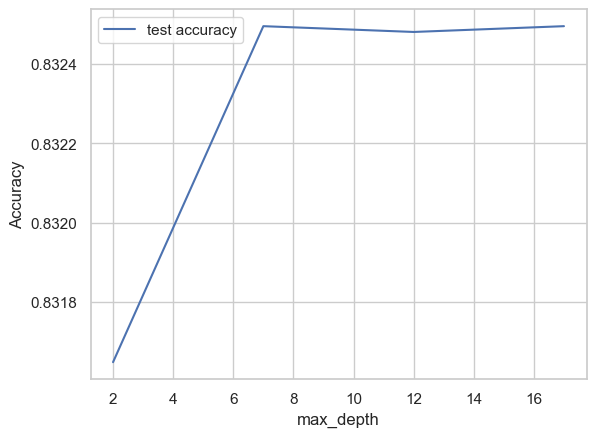

In [87]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [89]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [90]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8316326530612245 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [91]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [92]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [93]:
# predict
predictions = rfc.predict(X_test)

In [94]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       234
           1       0.00      0.00      0.00        60

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.44       294
weighted avg       0.63      0.80      0.71       294



In [96]:
print(confusion_matrix(y_test,predictions))

[[234   0]
 [ 60   0]]


In [97]:
(6753+692)/(6753+692+305+1250)

0.8272222222222222

In [98]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [100]:
import mglearn
from cycler import cycler

In [101]:
from sklearn.preprocessing import StandardScaler
# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 1.80314232  0.60003065 -1.282851   ... -0.24677591 -0.27317076
  -0.05238683]
 [-0.36929054  0.60003065 -1.05898509 ... -0.32083518 -0.33517265
  -1.18550878]
 [-0.84793321 -0.87311349 -0.72344509 ... -0.59408174  1.7426048
   0.57190178]
 ...
 [-0.17799425  0.60003065  0.34601262 ... -0.32083518 -0.33517265
   1.27342484]
 [-0.17799425  0.60003065  0.6251762  ...  2.33250408 -0.35131809
   1.42551121]
 [-1.54427059 -2.34625764 -0.01623077 ... -1.17067867 -0.65292384
  -1.18550878]] 	 [[-0.09484186  0.60003065 -1.02262358 ... -0.25500207 -0.65292384
   1.01656225]
 [-2.10732095 -0.87311349 -0.05979505 ... -1.17067867 -0.65292384
  -0.31424338]
 [-0.74929864  0.60003065 -1.71866161 ... -0.65551212 -0.65292384
  -0.86467472]
 ...
 [ 1.24143915  0.60003065  1.88385352 ...  2.31505147  3.94203316
  -0.51424241]
 [-0.83535615 -0.87311349 -0.26435183 ... -0.58184819 -0.65292384
  -0.26456356]
 [-0.00786698 -0.87311349  0.61890698 ... -0.8787623  -0.65292384
  -1.18550878]] 	 [[ 0.56434742

In [102]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1470, 30)
Reduced shape: (1470, 2)


In [103]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.13958264 0.05949392]


In [104]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[-0.14229486  0.62519532]
 [ 0.54434392 -0.64270103]
 [-2.59188812  1.03112398]
 ...
 [-0.90613454  0.07809809]
 [-0.10278674  0.01050854]
 [-0.67310017  0.29146503]] 19.907656390756735


In [105]:
# Selecting the model: Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Splitting the data - using one split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-Fold Cross-Validation - using k=10
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Calculate average score and standard deviation
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Cross-Validation Mean Accuracy:", cv_mean)
print("Cross-Validation Standard Deviation:", cv_std)

Cross-Validation Mean Accuracy: 0.8205924960162247
Cross-Validation Standard Deviation: 0.036058551106453014


   Configuration  Accuracy  Precision    Recall  F1-Score
0  Split 0.8/0.2  0.850340   1.000000  0.063830  0.120000
1  Split 0.7/0.3  0.850340   0.571429  0.059701  0.108108
2     10-Fold CV  0.825850   0.450000  0.037819  0.068594
3     20-Fold CV  0.824398   0.241667  0.021291  0.038368


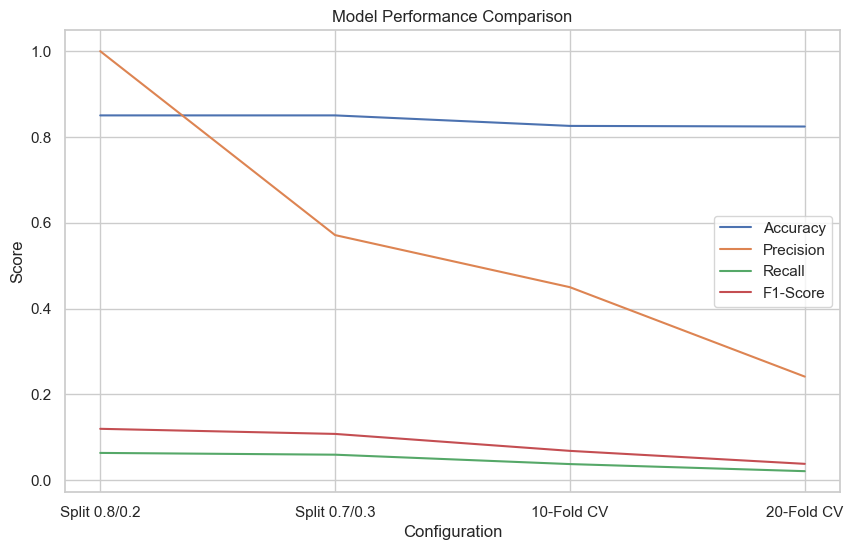

In [106]:

from sklearn.model_selection import train_test_split, cross_val_score, KFold

splits = [0.2, 0.3]  # Different test sizes for train-test split
kfolds = [10, 20]    # Different k values for k-fold cross-validation

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Configuration', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

for split in splits:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results = results.append({'Configuration': f'Split {1-split}/{split}',
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'F1-Score': f1}, ignore_index=True)

for k in kfolds:
    # k-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = RandomForestClassifier(random_state=42)
    
    accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precisions = cross_val_score(model, X, y, cv=kf, scoring='precision')
    recalls = cross_val_score(model, X, y, cv=kf, scoring='recall')
    f1s = cross_val_score(model, X, y, cv=kf, scoring='f1')
    
    results = results.append({'Configuration': f'{k}-Fold CV',
                              'Accuracy': np.mean(accuracies),
                              'Precision': np.mean(precisions),
                              'Recall': np.mean(recalls),
                              'F1-Score': np.mean(f1s)}, ignore_index=True)

# Display the results
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(results['Configuration'], results[metric], label=metric)
plt.xlabel('Configuration')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()
